## Exploratory Data Analysis

**Imports**

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "darkgrid")

import datetime as dt

**Reading in Data**

In [2]:
df = pd.read_csv('../data/showsandsets.csv')
setlists_df = pd.read_csv('../data/just_setlists.csv')

In [3]:
df.head(3)

,showid,showyear,showmonth,showdate,permalink,setlist_notes,venue,city,state,country,artist_name,tourid,tour_name,setlists
0,1251253100,1983,12,1983-12-02,https://phish.net/setlists/phish-december-02-1...,"Trey, Mike, Fish, and Jeff Holdsworth recall b...",Harris-Millis Cafeteria - University of Vermont,Burlington,VT,USA,Phish,1,1983 Tour,"['Long Cool Woman in a Black Dress', 'Proud Ma..."
1,1250613219,1984,10,1984-10-23,https://phish.net/setlists/phish-october-23-19...,"This show, played in the garage of a house on ...",69 Grant Street,Burlington,VT,USA,Phish,2,1984 Tour,['Makisupa Policeman']
2,1251262142,1984,11,1984-11-03,https://phish.net/setlists/phish-november-03-1...,"The setlist for this show might be incomplete,...","Slade Hall, University of Vermont",Burlington,VT,USA,Phish,2,1984 Tour,"['In the Midnight Hour', 'Wild Child', 'Jam', ..."


In [4]:
df.shape

(1804, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804 entries, 0 to 1803
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   showid         1804 non-null   int64 
 1   showyear       1804 non-null   int64 
 2   showmonth      1804 non-null   int64 
 3   showdate       1804 non-null   object
 4   permalink      1804 non-null   object
 5   setlist_notes  1804 non-null   object
 6   venue          1804 non-null   object
 7   city           1804 non-null   object
 8   state          1804 non-null   object
 9   country        1804 non-null   object
 10  artist_name    1804 non-null   object
 11  tourid         1804 non-null   int64 
 12  tour_name      1804 non-null   object
 13  setlists       1804 non-null   object
dtypes: int64(4), object(10)
memory usage: 197.4+ KB


In [6]:
df['showdate'] = pd.to_datetime(df['showdate'])

In [7]:
df.dtypes

showid                    int64
showyear                  int64
showmonth                 int64
showdate         datetime64[ns]
permalink                object
setlist_notes            object
venue                    object
city                     object
state                    object
country                  object
artist_name              object
tourid                    int64
tour_name                object
setlists                 object
dtype: object

**Examining Column Values**

In [8]:
df.columns

Index(['showid', 'showyear', 'showmonth', 'showdate', 'permalink',
       'setlist_notes', 'venue', 'city', 'state', 'country', 'artist_name',
       'tourid', 'tour_name', 'setlists'],
      dtype='object')

In [9]:
#just making sure we have only shows for Phish as Phish.net collects information on other bands
df['artist_name'].value_counts()

Phish    1804
Name: artist_name, dtype: int64

In [10]:
#the number of unique shows since the beginning:
df['showid'].nunique()

1804

In [26]:
df['showyear'].value_counts().sort_index()

1983      1
1984      3
1985     13
1986      9
1987     20
1988     53
1989     88
1990    127
1991    124
1992    124
1993    112
1994    128
1995     83
1996     73
1997     84
1998     71
1999     69
2000     58
2001      1
2002      3
2003     47
2004     21
2008      1
2009     52
2010     50
2011     41
2012     37
2013     41
2014     42
2015     31
2016     48
2017     29
2018     39
2019     41
2020      5
2021     35
Name: showyear, dtype: int64

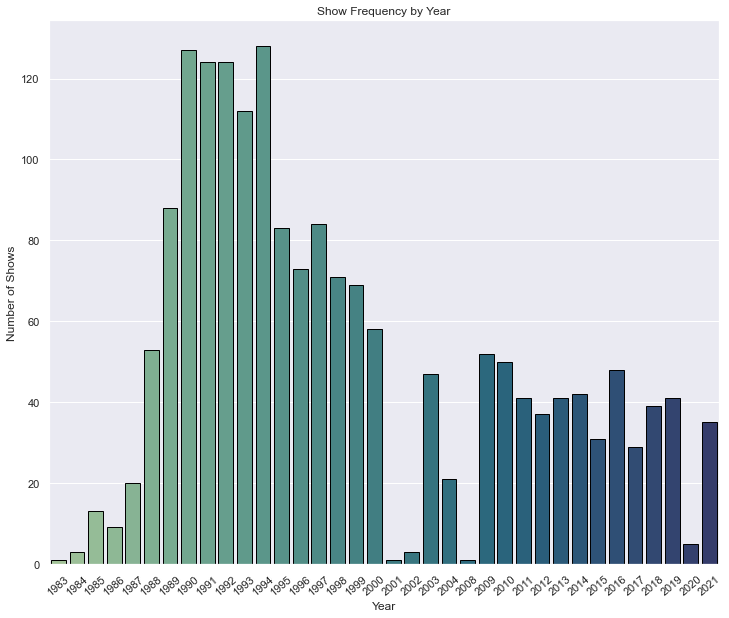

In [40]:
plt.figure(figsize = (12, 10))
fig = sns.countplot(x = 'showyear',
                    data = df,
                    palette = 'crest',
                    edgecolor = 'black')
fig.set(title = 'Show Frequency by Year',
        xlabel = 'Year',
        ylabel = 'Number of Shows')
fig.set_xticklabels(labels = sorted(df['showyear'].value_counts().index),
                    rotation=40);
#change the title/xlabel/ylabel sizes?

In [13]:
df['showmonth'].value_counts().sort_index(ascending = False)

12    183
11    166
10    216
9      91
8     199
7     294
6     183
5     117
4     130
3      96
2     101
1      28
Name: showmonth, dtype: int64

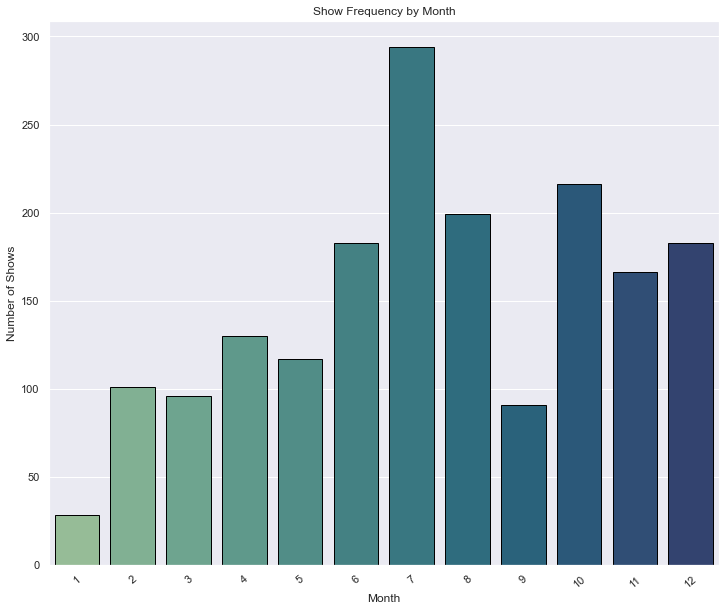

In [41]:
plt.figure(figsize = (12, 10))
fig = sns.countplot(x = 'showmonth',
                    data = df,
                    palette = 'crest',
                    edgecolor = 'black')
fig.set(title = 'Show Frequency by Month',
        xlabel = 'Month',
        ylabel = 'Number of Shows')
fig.set_xticklabels(labels = sorted(df['showmonth'].value_counts().index),
                    rotation = 40);
#change the title/xlabel/ylabel sizes?

In [13]:
df['venue'].value_counts().sort_values(ascending = False)
#Phish typically plays New Years' shows every year at MSG
#It makes sense they have the highest count of shows played

Madison Square Garden              64
The Front                          33
Dick's Sporting Goods Park         30
Nectar's                           24
Saratoga Performing Arts Center    22
                                   ..
Auditorium Theatre                  1
Club West                           1
Summer Pops, Embarcadero Center     1
Tenax                               1
Achilles Rink, Union College        1
Name: venue, Length: 766, dtype: int64

In [14]:
df['state'].value_counts().sort_values(ascending = False)

NY               277
VT               157
CA               127
Not Available    118
CO               102
MA                99
PA                69
VA                56
OH                49
GA                48
IL                47
NJ                45
NC                42
WA                39
FL                37
ME                36
NH                34
TN                34
IN                32
NV                32
WI                30
CT                27
MI                25
TX                25
OR                24
MD                23
RI                21
MO                20
SC                19
AZ                18
MN                14
AL                11
LA                11
DC                10
KS                 8
UT                 7
NM                 7
KY                 5
IA                 5
NE                 2
MS                 2
DE                 2
MT                 2
ID                 2
WV                 2
OK                 1
AR                 1
Name: state, 

In [15]:
df['city'].value_counts().sort_values(ascending = False)
#MSG is in New York and UVM is in Burlington, VT
#where the band was foudned

New York               109
Burlington             107
Commerce City           30
Philadelphia            29
Atlanta                 28
                      ... 
Santa Rosa               1
Clearwater               1
Burbank                  1
Castleton                1
San Juan Capistrano      1
Name: city, Length: 370, dtype: int64

In [16]:
df['country'].value_counts().sort_values(ascending = False)

USA               1687
Canada              19
Germany             18
Mexico              16
Japan               12
Italy               11
France              11
Denmark              8
England              5
Spain                4
Netherlands          4
Belgium              3
Czech Republic       3
Ireland              2
Austria              1
Name: country, dtype: int64

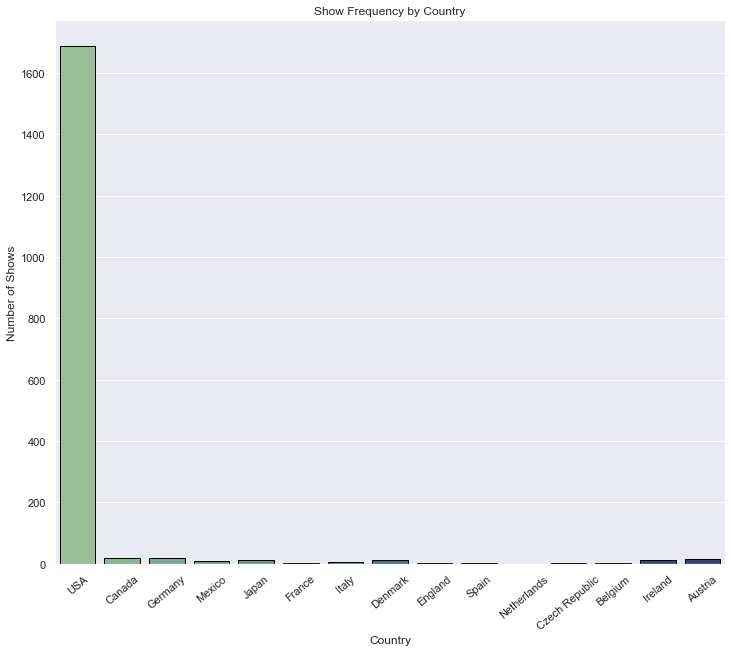

In [46]:
plt.figure(figsize = (12, 10))
fig = sns.countplot(x = 'country',
                    data = df,
                    palette = 'crest',
                    edgecolor = 'black')
fig.set(title = 'Show Frequency by Country',
        xlabel = 'Country',
        ylabel = 'Number of Shows')
fig.set_xticklabels(labels = df['country'].value_counts().index, rotation = 40);
#change the title/xlabel/ylabel sizes?

In [17]:
df['tourid'].value_counts().sort_index(ascending = False)

186    22
184     4
183     8
182    25
181     4
       ..
5      20
4       8
3      12
2       3
1       1
Name: tourid, Length: 94, dtype: int64

In [18]:
df['tour_name'].value_counts().sort_index(ascending = False)

Not Part of a Tour    110
Mexico 2017             3
Mexico 2016             3
2021 Summer Tour       22
2019 Summer Tour       25
                     ... 
1987 Tour              20
1986 Tour               8
1985 Tour              12
1984 Tour               3
1983 Tour               1
Name: tour_name, Length: 94, dtype: int64

In [19]:
df['setlists'].nunique()

1799

In [38]:
len(df['setlists'][0])

177

In [42]:
df['setlength'] = df['setlists'].str.split(", ").str.len()
df['setlength'].mean()

19.96840354767184